<h3>Problem Statement</h3>

In this exercise, you will implement linear regression with one variable to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file house_price_data1.csv contains a set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), and the second column is the price of the house.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset into Python environment
column_names = ['area in sq.ft','price in $']
data = pd.read_csv('house_price_data1.csv',names=column_names,)
data.head()

area in sq.ft  price in $
0           2104      399900
1           1600      329900
2           2400      369000
3           1416      232000
4           3000      539900

There are only two columns in the dataset: 
* area in sq.ft which is our input data X
* price in \$ which is our output y

Since there is only one input varaible, this is a simple linear regression and the model is $$y = mx+c$$ Here $m$ is the slope and $c$ is the intercept.

We can rewrite the above equation as: $$y=w_1x_1+w_0x_0$$ where 
* $w_1$ is equivalent to $m$, 
* $w_0$ is equivalent to $c$,
* $x_1$ is equivalent to $x$ and
* $x_0$ is a vector of 1's, which is of size $x_1$. We call $x_0$ as _intercept feature_. 

<h4>Note:</h4>
You need to append $x_0$ explicitly to your data if you are implementing your own Linear Regression method. In case if you are using the methods/classes from sklearn, you can ignore appending this intercept to your dataset. 

In this exercise, we use `LinearRegression` from `sklearn.linear_model` which inherently takes care of the intercept. So, no need to append it to our dataset. 

In [3]:
# Lets build the input data X
X = pd.DataFrame(data.iloc[:,0])
X.head()

area in sq.ft
0           2104
1           1600
2           2400
3           1416
4           3000

In [4]:
X.shape

(47, 1)

In [5]:
# Build the output data y
y = pd.DataFrame(data.iloc[:,1])
y.shape

(47, 1)

In [6]:
from sklearn.linear_model import LinearRegression
# LineareRegression can calculate the intercept
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

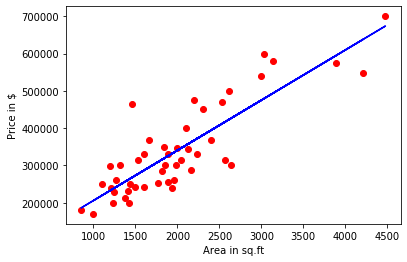

In [7]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.xlabel("Area in sq.ft")
plt.ylabel("Price in $")
plt.show()

You can look at the values (coefficients and intercept) the model has learnt during the training phase. 

In [8]:
print('Coefficient of x:',regressor.coef_)
print('Intercept:',regressor.intercept_)

Coefficient of x: [[134.52528772]]
Intercept: [71270.49244873]


So, the model becomes $y=134.52528772x+71270.49244873$. We can predict house prices ($y$) given the area ($x$) just by plugging in the value of $x$ in this equation. 

Let's predict the price of a house with 1650 square feet.

In [9]:
134.52528772*1650+71270.49244873

293237.21718673

We can even use the `regressor` object to predict prices of houses. Suppose you want to know a good market price for houses with area 1160, 1650, 1750, 1950, 2025 square feet. 

In [10]:
test_X = pd.DataFrame([1160,1650,1750,1950,2025],columns=['area in sq.ft'])
predicted_y = regressor.predict(test_X)
predicted_y

array([[227319.82620421],
       [293237.21718713],
       [306689.74595915],
       [333594.8035032 ],
       [343684.20008222]])